In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Structuring the data from raw text file

#### train dataset

In [2]:
train_text = []
with open('./../dataset/train.txt') as fp:
    train_text = fp.readlines()
# /content/val.txt

In [3]:
print(len(train_text),train_text[0])
train_text[0].rsplit(';',maxsplit=1)

16000 i didnt feel humiliated;sadness



['i didnt feel humiliated', 'sadness\n']

In [4]:
train_data = []
for dt in train_text:
    sen,emt = dt.rsplit(';',maxsplit=1)
    train_data.append([sen,emt.replace('\n','')])
print(len(train_data),train_data[:5])

16000 [['i didnt feel humiliated', 'sadness'], ['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'sadness'], ['im grabbing a minute to post i feel greedy wrong', 'anger'], ['i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'love'], ['i am feeling grouchy', 'anger']]


In [5]:
train_df = pd.DataFrame(train_data,columns=['sentence','emotion'])
train_df.head()

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16000 non-null  object
 1   emotion   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [7]:
train_df['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

<AxesSubplot:xlabel='emotion', ylabel='count'>

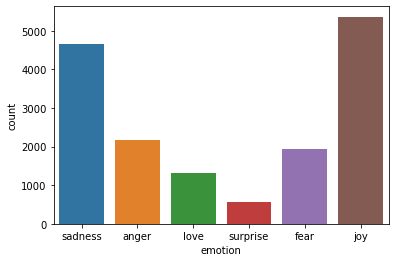

In [8]:
sns.countplot(x='emotion',data=train_df)

#### test dataset

In [9]:
test_data = []
with open('./../dataset/test.txt') as fp:
    temp = fp.readlines()
    for t in temp:
        sen,emt = t.rsplit(';',maxsplit=1)
        test_data.append([sen,emt.replace('\n','')])
print(len(test_data),test_data[:5])
test_df = pd.DataFrame(test_data,columns=['sentence','emotion'])
test_df.head()

2000 [['im feeling rather rotten so im not very ambitious right now', 'sadness'], ['im updating my blog because i feel shitty', 'sadness'], ['i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'sadness'], ['i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived', 'joy'], ['i was feeling a little vain when i did this one', 'sadness']]


,sentence,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2000 non-null   object
 1   emotion   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


### Clean Text 

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

In [12]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanshubag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanshubag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
stopword_all =  list(set(stopwords.words('english'))) 
stopword_all.extend(list(string.punctuation))
print(len(stopword_all))

211


In [14]:
def clean_text(text):
    text = text.lower()
    text= re.sub(r"(#[\d\w\.]+)", '', text)
    text = re.sub(r"(@[\d\w\.]+)", '', text)
    text = word_tokenize(text)
    text = [word for word in text if word not in stopword_all]
#     print(text)
    text = ' '.join(text)
    return text
clean_text(train_df['sentence'].values[0])

'didnt feel humiliated'

In [15]:
train_df['clean_sentence'] = train_df['sentence'].apply(lambda x: clean_text(x))

In [16]:
train_df.head()

,sentence,emotion,clean_sentence
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [17]:
test_df['clean_sentence'] = test_df['sentence'].apply(lambda x: clean_text(x))
test_df.head()

,sentence,emotion,clean_sentence
0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten im ambitious right
1,im updating my blog because i feel shitty,sadness,im updating blog feel shitty
2,i never make her separate from me because i do...,sadness,never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,joy,left bouquet red yellow tulips arm feeling sli...
4,i was feeling a little vain when i did this one,sadness,feeling little vain one


### preprocess text ( tokenize )

In [18]:
all_sen = []
all_sen.extend(train_df['clean_sentence'].values)
all_sen.extend(test_df['clean_sentence'].values)

print(len(all_sen),type(all_sen))

18000 <class 'list'>


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_sen)

In [21]:
print("The document count",tokenizer.document_count)
print(len(tokenizer.word_index),len(tokenizer.word_counts))
# print("The count of words",tokenizer.word_counts)

The document count 18000
16033 16033


In [22]:
import joblib
joblib.dump(tokenizer,'./../model/tokenizer.pkl')

['./../model/tokenizer.pkl']

In [ ]:
train_seq = tokenizer.texts_to_sequences(train_df['clean_sentence'].values)
test_seq = tokenizer.texts_to_sequences(test_df['clean_sentence'].values)

In [ ]:
embd_dim = 100
max_seq_len = 500
vocab_size = len(tokenizer.word_index)+1

In [ ]:
train_seq_x_pad = pad_sequences(train_seq,maxlen=max_seq_len)
test_seq_x_pad = pad_sequences(test_seq,maxlen=max_seq_len)

In [ ]:
train_seq_x_pad

array([[   0,    0,    0, ...,   50,    1,  527],
       [   0,    0,    0, ...,   54, 1460, 1214],
       [   0,    0,    0, ...,    1,  349,  303],
       ...,
       [   0,    0,    0, ...,  235,   33, 1299],
       [   0,    0,    0, ..., 1089,    4,  224],
       [   0,    0,    0, ...,    1,  185, 3714]], dtype=int32)

In [ ]:
test_seq_x_pad

array([[   0,    0,    0, ...,    4, 4543,   37],
       [   0,    0,    0, ...,  139,    1,  347],
       [   0,    0,    0, ...,    1,    3,  288],
       ...,
       [   0,    0,    0, ...,  189,    2, 3152],
       [   0,    0,    0, ...,  110,  827, 2371],
       [   0,    0,    0, ...,  194,  194, 1692]], dtype=int32)

#### label encode / output

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

train_df['enc_emotion'] = label_encode.fit_transform(train_df['emotion'])
test_df['enc_emotion'] = label_encode.transform(test_df['emotion'])


In [24]:
num_class = len(label_encode.classes_)
num_class

6

In [25]:
joblib.dump(label_encode,'./../model/label_encoder.pkl')

['./../model/label_encoder.pkl']

In [ ]:
train_df.head()

,sentence,emotion,clean_sentence,enc_emotion
0,i didnt feel humiliated,sadness,didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,feeling grouchy,0


In [ ]:
test_df.head()

,sentence,emotion,clean_sentence,enc_emotion
0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten im ambitious right,4
1,im updating my blog because i feel shitty,sadness,im updating blog feel shitty,4
2,i never make her separate from me because i do...,sadness,never make separate ever want feel like ashamed,4
3,i left with my bouquet of red and yellow tulip...,joy,left bouquet red yellow tulips arm feeling sli...,2
4,i was feeling a little vain when i did this one,sadness,feeling little vain one,4


In [ ]:
train_y = pd.get_dummies(train_df['enc_emotion']).values
test_y = pd.get_dummies(test_df['enc_emotion']).values

print(train_seq_x_pad.shape,train_y.shape)
print(test_seq_x_pad.shape,test_y.shape)

(16000, 500) (16000, 6)
(2000, 500) (2000, 6)


In [ ]:
(train_y)

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

#### use pretrained embedding or not  ?
 - not using for now

### Model Training 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [ ]:
model = Sequential([
    Embedding(vocab_size,embd_dim,input_length=max_seq_len),
    LSTM(100,dropout=0.2,recurrent_dropout=0.2),
    Dense(128,activation="relu"),
    Dense(num_class,activation="softmax")
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 100)          1603400   
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 128)               12928     
                                                                 
 dense_5 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1,697,502
Trainable params: 1,697,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()
from keras.callbacks import ModelCheckpoint
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.h5'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min') 
call_back = [checkpoint]

In [ ]:
batch_size=512
epochs=20

model.fit(train_seq_x_pad,train_y,batch_size=batch_size,epochs=epochs,validation_data=(test_seq_x_pad,test_y),callbacks=[call_back])


Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 1.6196 - accuracy: 0.3296
Epoch 1: val_loss improved from inf to 1.54561, saving model to my_best_model.epoch01-loss1.55.h5
32/32 [==============================] - 111s 3s/step - loss: 1.6196 - accuracy: 0.3296 - val_loss: 1.5456 - val_accuracy: 0.3480
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 1.4984 - accuracy: 0.4314
Epoch 2: val_loss improved from 1.54561 to 1.33296, saving model to my_best_model.epoch02-loss1.33.h5
32/32 [==============================] - 108s 3s/step - loss: 1.4984 - accuracy: 0.4314 - val_loss: 1.3330 - val_accuracy: 0.5345
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 1.0008 - accuracy: 0.6288
Epoch 3: val_loss improved from 1.33296 to 0.91678, saving model to my_best_model.epoch03-loss0.92.h5
32/32 [==============================] - 107s 3s/step - loss: 1.0008 - accuracy: 0.6288 - val_loss: 0.9168 - val_accuracy: 0.6895
Epoch 4/20
32/32 [========

In [ ]:
history = model.history

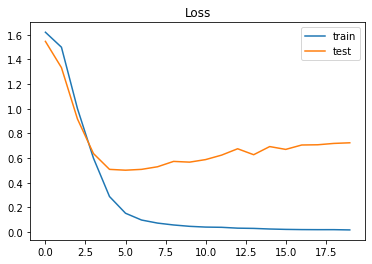

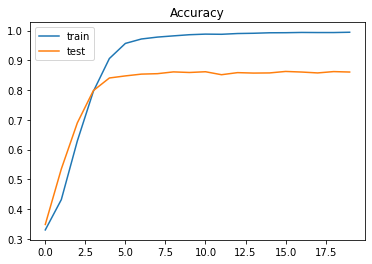

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [ ]:
# save model
model.save('lstm_simple.h5')

In [ ]:
# from tensorflow import keras. 0.40
# model = keras.models.load_model('path/to/location')

### Test on Validation set

In [ ]:
# validation set
val_data = []
with open('./../dataset/val.txt') as fp:
    temp = fp.readlines()
    for t in temp:
        sen,emt = t.rsplit(';',maxsplit=1)
        val_data.append([sen,emt.replace('\n','')])
print(len(val_data),val_data[:5])
val_df = pd.DataFrame(val_data,columns=['sentence','emotion'])
val_df.head()

2000 [['im feeling quite sad and sorry for myself but ill snap out of it soon', 'sadness'], ['i feel like i am still looking at a blank canvas blank pieces of paper', 'sadness'], ['i feel like a faithful servant', 'love'], ['i am just feeling cranky and blue', 'anger'], ['i can have for a treat or if i am feeling festive', 'joy']]


,sentence,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2000 non-null   object
 1   emotion   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
val_df['clean_sentence'] = val_df['sentence'].apply(lambda x: clean_text(x))
val_df.head()

,sentence,emotion,clean_sentence
0,im feeling quite sad and sorry for myself but ...,sadness,im feeling quite sad sorry ill snap soon
1,i feel like i am still looking at a blank canv...,sadness,feel like still looking blank canvas blank pie...
2,i feel like a faithful servant,love,feel like faithful servant
3,i am just feeling cranky and blue,anger,feeling cranky blue
4,i can have for a treat or if i am feeling festive,joy,treat feeling festive


In [ ]:
val_seq = tokenizer.texts_to_sequences(val_df['clean_sentence'].values)
val_seq_x_pad = pad_sequences(val_seq,maxlen=max_seq_len)
val_seq_x_pad.shape

(2000, 500)

In [ ]:
val_df['enc_emotion'] = label_encode.transform(val_df['emotion'])
val_y = pd.get_dummies(val_df['enc_emotion']).values

In [ ]:
val_seq_x_pad.shape,val_y.shape

((2000, 500), (2000, 6))

In [ ]:
val_res = model.predict(val_seq_x_pad)

In [ ]:
res=[np.argmax(i) for i in val_res]
len(res),len(val_df['enc_emotion'].values)

(2000, 2000)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(res,val_df['enc_emotion'].values))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       291
           1       0.78      0.82      0.80       202
           2       0.91      0.89      0.90       718
           3       0.70      0.82      0.76       153
           4       0.91      0.89      0.90       562
           5       0.70      0.77      0.74        74

    accuracy                           0.87      2000
   macro avg       0.82      0.84      0.83      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
# res,label_encode.inverse_transform([res])

In [ ]:
# val_res